In [1]:
import sys, os
import importlib
import pandas as pd


In [2]:
sys.path.append(os.path.abspath(".."))

In [3]:
from src.config import  CLEAN_PARQUET
from src.artifacts import load_df

In [4]:
import src.tuner
importlib.reload(src.tuner)
from src.tuner import (
    run_tuning_and_evaluation
)

In [5]:
df = load_df(CLEAN_PARQUET)

In [6]:
print("After dummies:", df.shape)
print("New columns:", df.columns.tolist())

After dummies: (614, 13)
New columns: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y']



=== Logistic Regression (tuned) ===
Best Params: {'logisticregression__C': 0.01, 'logisticregression__class_weight': None}
Accuracy: 0.8617886178861789
F1 Score: 0.9081081081081082
              precision    recall  f1-score   support

       False       0.96      0.58      0.72        38
        True       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



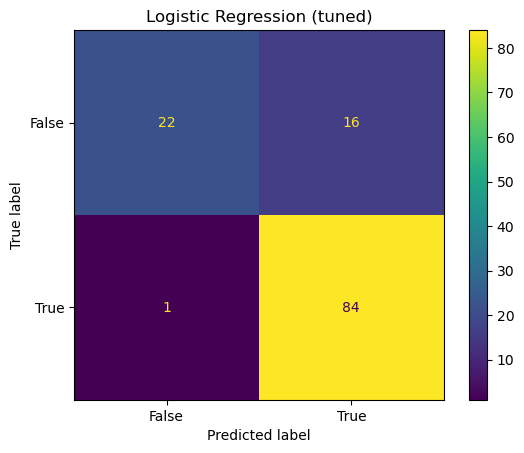


=== SVM (Linear) (tuned) ===
Best Params: {'svc__C': 0.01, 'svc__class_weight': None}
Accuracy: 0.8536585365853658
F1 Score: 0.9032258064516129
              precision    recall  f1-score   support

       False       0.95      0.55      0.70        38
        True       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



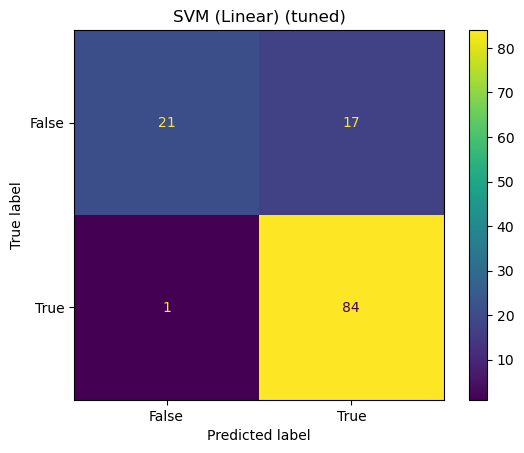


=== Naive Bayes (tuned) ===
Best Params: {'var_smoothing': 1e-09}
Accuracy: 0.8455284552845529
F1 Score: 0.8961748633879781
              precision    recall  f1-score   support

       False       0.88      0.58      0.70        38
        True       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



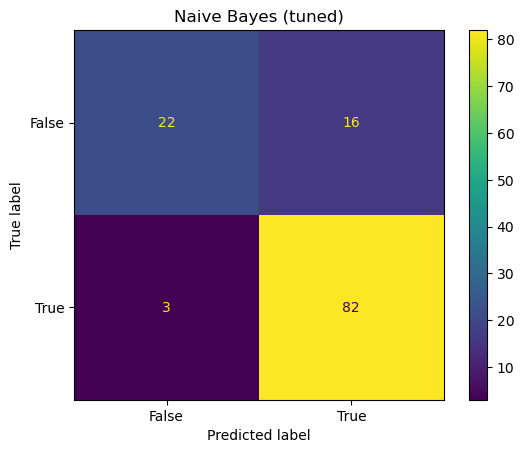


=== Tuned Model Comparison ===
                 Model  Accuracy        F1  \
0  Logistic Regression  0.861789  0.908108   
1         SVM (Linear)  0.853659  0.903226   
2          Naive Bayes  0.845528  0.896175   

                                         Best Params  
0  {'logisticregression__C': 0.01, 'logisticregre...  
1        {'svc__C': 0.01, 'svc__class_weight': None}  
2                           {'var_smoothing': 1e-09}  
✅ Expected columns saved to: C:\Users\mukil\Downloads\Loan Approval Prediction\Loan-Approval-Prediction\artifacts\expected_cols.pkl

✅ Best model 'Logistic Regression' saved to: C:\Users\mukil\Downloads\Loan Approval Prediction\Loan-Approval-Prediction\artifacts\logistic_regression_best.pkl
Summary saved to: C:\Users\mukil\Downloads\Loan Approval Prediction\Loan-Approval-Prediction\artifacts\tuned_model_summary.csv


(                 Model  Accuracy        F1  \
 0  Logistic Regression  0.861789  0.908108   
 1         SVM (Linear)  0.853659  0.903226   
 2          Naive Bayes  0.845528  0.896175   
 
                                          Best Params  
 0  {'logisticregression__C': 0.01, 'logisticregre...  
 1        {'svc__C': 0.01, 'svc__class_weight': None}  
 2                           {'var_smoothing': 1e-09}  ,
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.01, max_iter=5000,
                                     solver='liblinear'))]),
 WindowsPath('C:/Users/mukil/Downloads/Loan Approval Prediction/Loan-Approval-Prediction/artifacts/logistic_regression_best.pkl'))

In [7]:
tuned_results  = run_tuning_and_evaluation(df, target="Loan_Status_Y") 
tuned_results 